### Document Classification with Attention

In [1]:
from utils import *
from data import DocumentDataset, PAD_TOKEN
from model import ClassificationAttentionModel, ClassificationBERTModel, ClassificationTransformerModel
from visualizer import Visualizer
from transformers import BertTokenizer

In [2]:
DATA_SET_SIZE = 'small'

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

tokenizer = get_tokenizer(
    data_path=f'../resources/nlpwdl2021_data/thedeep.{DATA_SET_SIZE}.train.txt', 
    save_path='../resources/tokenizer.json'
)

# pretrained embeddigns taken from http://nlp.stanford.edu/data/glove.840B.300d.zip
embedding = get_initial_embedding(
    path='../resources/glove/glove.840B.300d.txt',
    tokenizer=tokenizer,
    save_path='../resources/initial_embedding.npy'
)

Loaded tokenizer. Vocabulary size: 25000.


In [4]:
print(nearest_neighbors(embedding.cpu(), tokenizer.get_vocab(), 'man'))
print(nearest_neighbors(embedding.cpu(), tokenizer.get_vocab(), 'car'))
print(nearest_neighbors(embedding.cpu(), tokenizer.get_vocab(), 'driver'))

['woman', 'guy', 'boy', 'he', 'mans', 'gentleman', 'one', 'men', 'knows', 'thing']
['cars', 'vehicle', 'automobile', 'truck', 'driving', 'auto', 'vehicles', 'tow', 'rental', 'taxi']
['drivers', 'driving', 'cab', 'car', 'speeding', 'drive', 'truck', 'bus', 'driven', 'when']


In [5]:
batch_size = 128

train_set = DocumentDataset(
    path=f'../resources/nlpwdl2021_data/thedeep.{DATA_SET_SIZE}.train.txt',
    tokenizer=tokenizer,
    document_length=-1
)
train_loader = DataLoader(train_set, batch_size=batch_size, collate_fn=pad_collate(tokenizer.token_to_id(PAD_TOKEN)))

val_set = DocumentDataset(
    path=f'../resources/nlpwdl2021_data/thedeep.{DATA_SET_SIZE}.validation.txt',
    tokenizer=tokenizer,
    document_length=-1
)
val_loader=DataLoader(val_set, batch_size=batch_size, collate_fn=pad_collate(tokenizer.token_to_id(PAD_TOKEN)))

test_set = DocumentDataset(
    path=f'../resources/nlpwdl2021_data/thedeep.{DATA_SET_SIZE}.test.txt',
    tokenizer=tokenizer,
    document_length=-1
)
test_loader=DataLoader(test_set, batch_size=batch_size, collate_fn=pad_collate(tokenizer.token_to_id(PAD_TOKEN)))

### Bidirectional LSTM with Attention

Epoch 15. Validation loss: 1.285 (accuracy: 0.615)


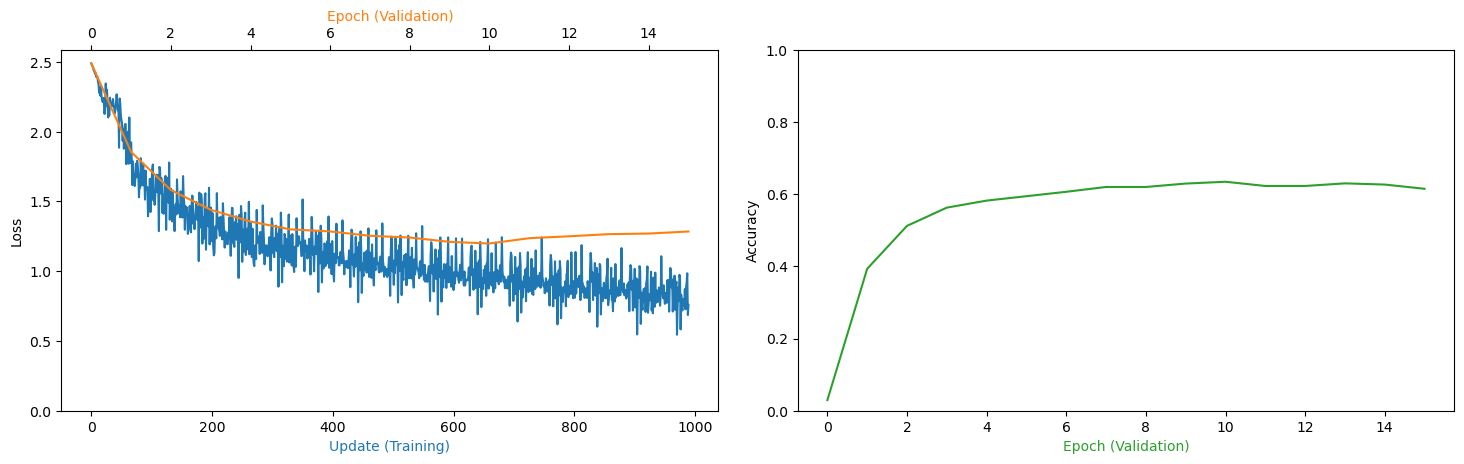

Test accuracy: 0.6222


In [13]:
test_acc = train_and_evaluate(
    model=ClassificationAttentionModel(embedding.weight.clone(), train_set.num_classes).to(device),
    name='attention_classifier',
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader
)
print(f'Test accuracy: {test_acc:.4f}')

### Attention (without LSTM)

Epoch 17. Validation loss: 1.309 (accuracy: 0.608)


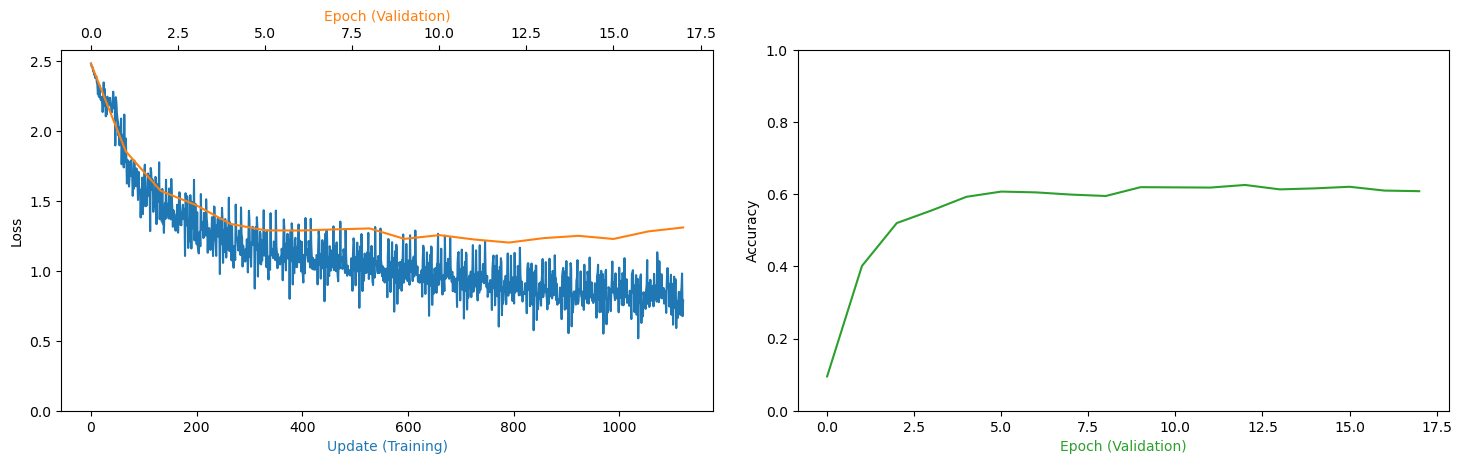

Test accuracy: 0.6300


In [14]:
test_acc = train_and_evaluate(
    model=ClassificationAttentionModel(embedding.weight.clone(), train_set.num_classes).to(device),
    name='attention_classifier_no_lstm',
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader
)
print(f'Test accuracy: {test_acc:.4f}')

### Additive Attention

Epoch 14. Validation loss: 1.288 (accuracy: 0.623)


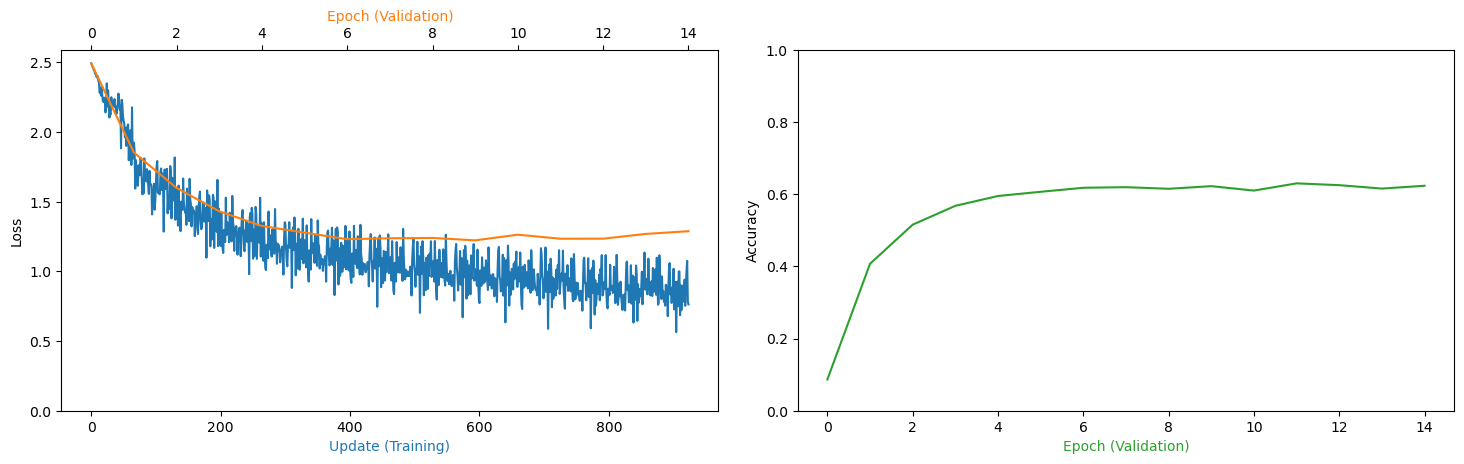

Test accuracy: 0.6067


In [15]:
test_acc = train_and_evaluate(
    model=ClassificationAttentionModel(embedding.weight.clone(), train_set.num_classes, attention_type='additive').to(device),
    name='attention_classifier_additive_attention',
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader
)
print(f'Test accuracy: {test_acc:.4f}')

### Multiplicative Attention

Epoch 18. Validation loss: 1.322 (accuracy: 0.593)


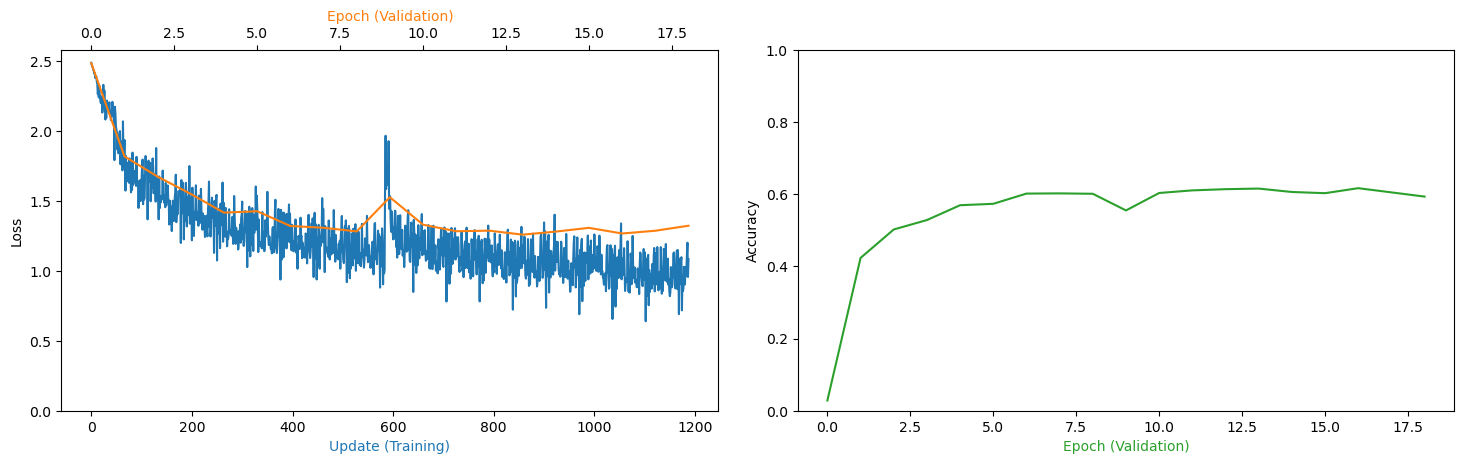

Test accuracy: 0.6278


In [16]:
test_acc = train_and_evaluate(
    model=ClassificationAttentionModel(embedding.weight.clone(), train_set.num_classes, attention_type='multiplicative').to(device),
    name='attention_classifier_multiplicative_attention',
    train_loader=train_loader,
    val_loader=val_loader,
    test_loader=test_loader
)
print(f'Test accuracy: {test_acc:.4f}')

### Transformer

In [6]:
batch_size = 32

transformer_train_set = DocumentDataset(
    path=f'../resources/nlpwdl2021_data/thedeep.{DATA_SET_SIZE}.train.txt',
    tokenizer=tokenizer,
    document_length=512
)
transformer_train_loader = DataLoader(transformer_train_set, batch_size=batch_size, collate_fn=pad_collate(tokenizer.token_to_id(PAD_TOKEN)))

transformer_val_set = DocumentDataset(
    path=f'../resources/nlpwdl2021_data/thedeep.{DATA_SET_SIZE}.validation.txt',
    tokenizer=tokenizer,
    document_length=512
)
transformer_val_loader=DataLoader(transformer_val_set, batch_size=batch_size, collate_fn=pad_collate(tokenizer.token_to_id(PAD_TOKEN)))

transformer_test_set = DocumentDataset(
    path=f'../resources/nlpwdl2021_data/thedeep.{DATA_SET_SIZE}.test.txt',
    tokenizer=tokenizer,
    document_length=512
)
transformer_test_loader=DataLoader(transformer_test_set, batch_size=batch_size, collate_fn=pad_collate(tokenizer.token_to_id(PAD_TOKEN)))

### Default Parameters

Epoch 9. Validation loss: 1.518 (accuracy: 0.608)


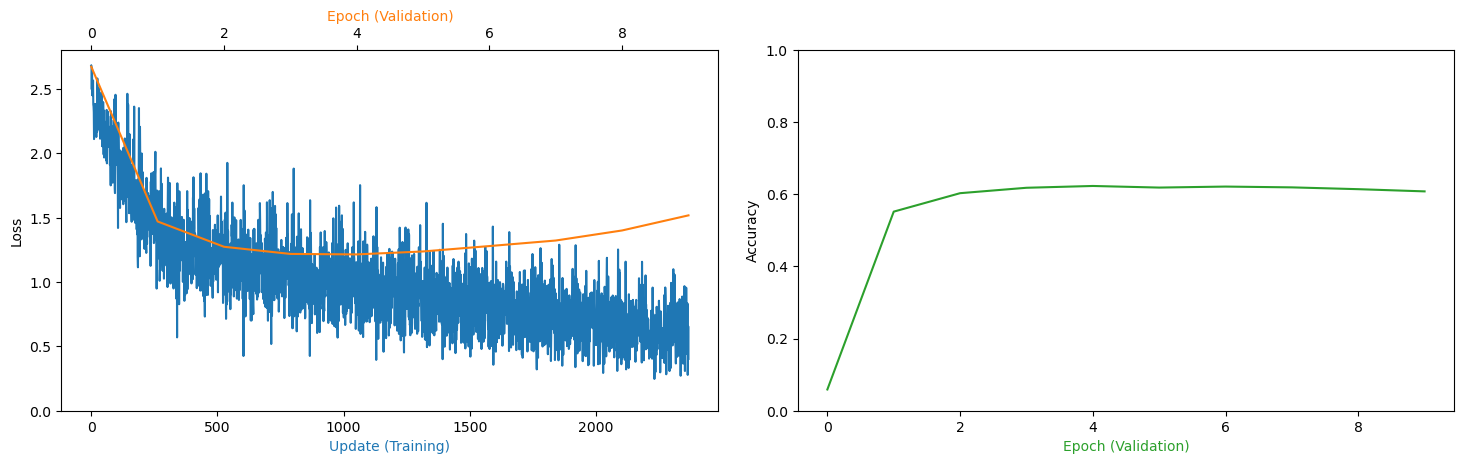

Test accuracy: 0.6267


In [7]:
test_acc = train_and_evaluate(
    model=ClassificationTransformerModel(embedding.weight.clone(), transformer_train_set.num_classes).to(device),
    name='transformer_classifier',
    train_loader=transformer_train_loader,
    val_loader=transformer_val_loader,
    test_loader=transformer_test_loader
)
print(f'Test accuracy: {test_acc:.4f}')

### More Heads

Epoch 9. Validation loss: 1.540 (accuracy: 0.584)


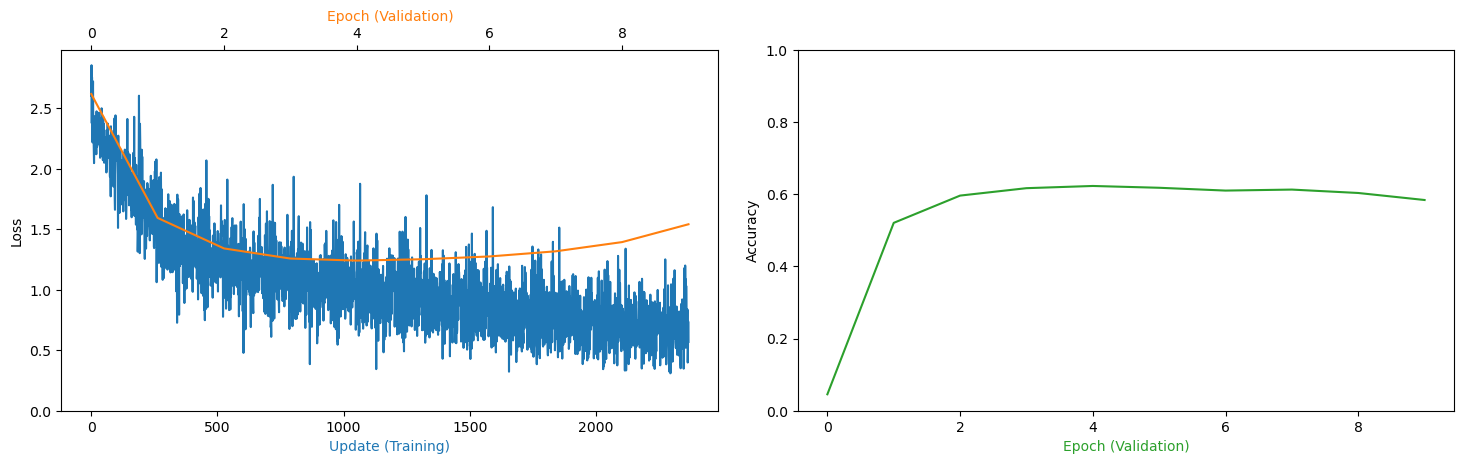

Test accuracy: 0.6156


In [8]:
test_acc = train_and_evaluate(
    model=ClassificationTransformerModel(embedding.weight.clone(), transformer_train_set.num_classes, num_heads=16).to(device),
    name='transformer_classifier_more_heads',
    train_loader=transformer_train_loader,
    val_loader=transformer_val_loader,
    test_loader=transformer_test_loader
)
print(f'Test accuracy: {test_acc:.4f}')

### Less Heads

Epoch 9. Validation loss: 1.443 (accuracy: 0.602)


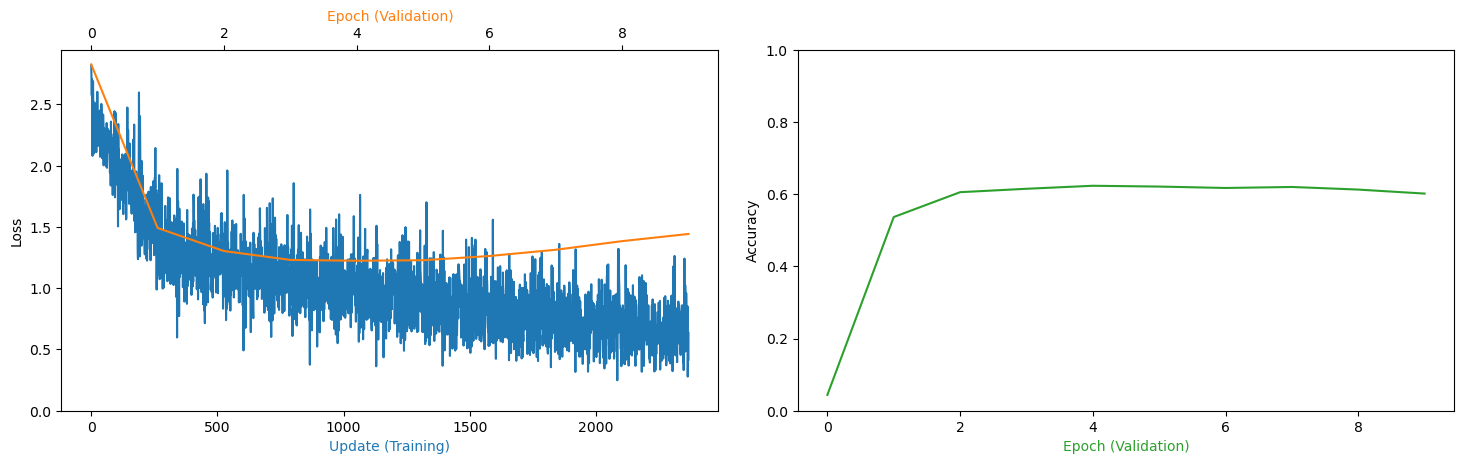

Test accuracy: 0.6143


In [5]:
test_acc = train_and_evaluate(
    model=ClassificationTransformerModel(embedding.weight.clone(), transformer_train_set.num_classes, num_heads=4).to(device),
    name='transformer_classifier_less_heads',
    train_loader=transformer_train_loader,
    val_loader=transformer_val_loader,
    test_loader=transformer_test_loader
)
print(f'Test accuracy: {test_acc:.4f}')

### More Layers

Epoch 12. Validation loss: 1.261 (accuracy: 0.627)


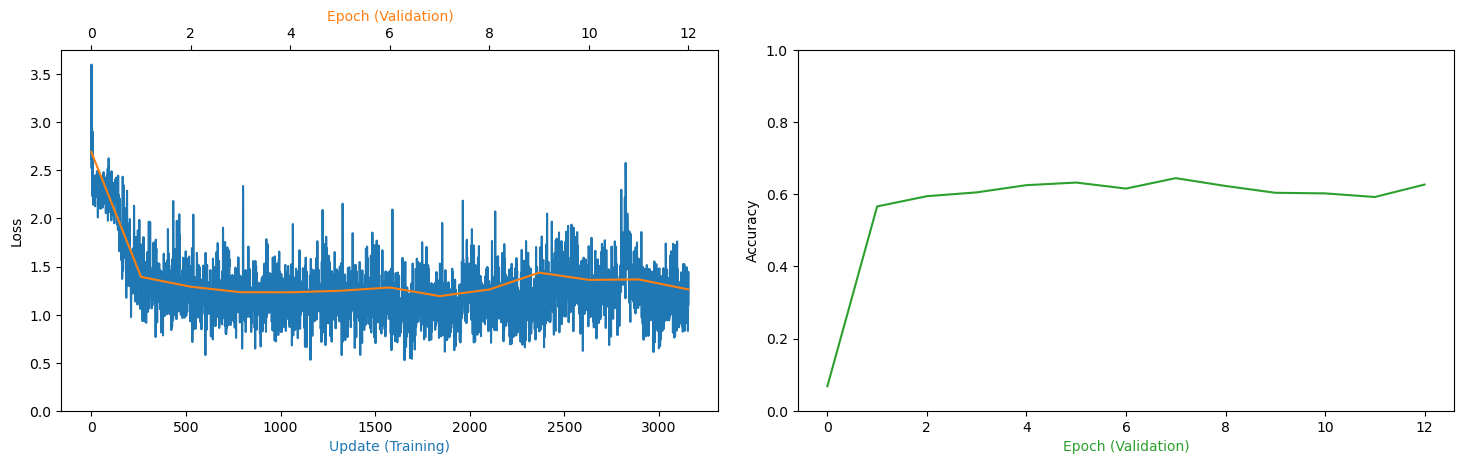

Test accuracy: 0.6433


In [6]:
test_acc = train_and_evaluate(
    model=ClassificationTransformerModel(embedding.weight.clone(), transformer_train_set.num_classes, num_transformer_layers=4).to(device),
    name='transformer_classifier_more_layers',
    train_loader=transformer_train_loader,
    val_loader=transformer_val_loader,
    test_loader=transformer_test_loader
)
print(f'Test accuracy: {test_acc:.4f}')

|Variant|Test Accuracy [%]|
|:-|:-:|
|Default|62.7|
|More Heads|61.6|
|Less Heads|61.4|
|More Layers|64.3|

The results are very similar with adding additional layers having the most influence. 

### BERT

In [4]:
batch_size = 12

bert_tokenizer = BertTokenizer.from_pretrained('bert-base-cased', use_fast=True)

bert_train_set = DocumentDataset(
    path=f'../resources/nlpwdl2021_data/thedeep.{DATA_SET_SIZE}.train.txt',
    tokenizer=bert_tokenizer,
    document_length=512
)
bert_train_loader = DataLoader(bert_train_set, batch_size=batch_size, collate_fn=pad_collate(bert_tokenizer.convert_tokens_to_ids(PAD_TOKEN)))

bert_val_set = DocumentDataset(
    path=f'../resources/nlpwdl2021_data/thedeep.{DATA_SET_SIZE}.validation.txt',
    tokenizer=bert_tokenizer,
    document_length=512
)
bert_val_loader=DataLoader(bert_val_set, batch_size=batch_size, collate_fn=pad_collate(bert_tokenizer.convert_tokens_to_ids(PAD_TOKEN)))

bert_test_set = DocumentDataset(
    path=f'../resources/nlpwdl2021_data/thedeep.{DATA_SET_SIZE}.test.txt',
    tokenizer=bert_tokenizer,
    document_length=512
)
bert_test_loader=DataLoader(bert_test_set, batch_size=batch_size, collate_fn=pad_collate(bert_tokenizer.convert_tokens_to_ids(PAD_TOKEN)))

Epoch 10. Validation loss: 2.265 (accuracy: 0.221)


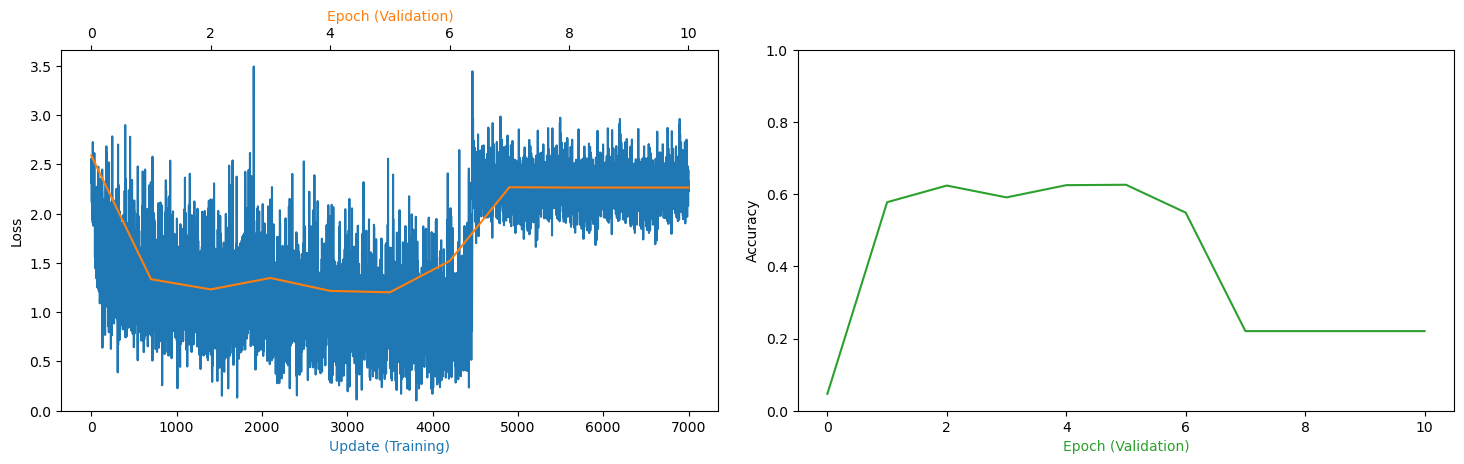

Test accuracy: 0.6139


In [5]:
test_acc = train_and_evaluate(
    model=ClassificationBERTModel(bert_train_set.num_classes).to(device),
    name='bert_classifier',
    train_loader=bert_train_loader,
    val_loader=bert_val_loader,
    test_loader=bert_test_loader
)
print(f'Test accuracy: {test_acc:.4f}')

### Visualize Attention Weights

In [12]:
model = ClassificationAttentionModel(embedding.weight.clone(), train_set.num_classes, attention_type='additive').to(device)
model.load_state_dict(torch.load('../runs/attention_classifier_additive_attention/checkpoints/best.pt'))

visualizer = Visualizer(model, tokenizer)
correct, misclassified = test_set.find_examples(model, seed=0)

In [13]:
for i in correct:
    visualizer.show_html(test_set.documents[i], test_set.labels[i])

In [14]:
for i in misclassified:
    visualizer.show_html(test_set.documents[i], test_set.labels[i])